# Schemdraw Guide book

**Author**: armanbijari@um.ac.ir

![Arman Bijari](../Circuit_Electronics/CircuitElectronicsImages/ArmanBijari.jpg)


## Table of Contents

### 1-introduction
### 2-Installation
### 3-Element Categorization 
### 4-Basic Element Drawing
### 5-Drawing Elements at Angles
### 6-Connecting Elements
### 7-Customizing Components
### 8-Annotations and Labels
### 9-Advanced Circuits and Examples
### 10-Conclusion
### 11-Resources

## 1. Introduction
In this guid we are going to understand what schemdraw is and how it works `Schemdraw` is a python library for creating electrical circuit schematics in a simple way. It allows you to generate high-quality vector graphics which can be used in presentations and similar events.
here are some features that schemdraw has:

### Text-Based Drawing: 
you can define circuits using simple `Python` command, making it easy to create and modify designs.

### Component Library:
It includes a variety of common components like resistors capacitors and etc which can be easily placed and connected

### Customizability:
Users can customize components and layouts to fit specific needs, offering flexibility in design.
### Export Option:
Schemdraw allows exporting diagrams in various formats, making it easy to integrete into documents or presentations.


## 2. Installation
At first you have to install `python` and `pip` on your machine following this steps: 

1.Install the latest python from [python.org](https://www.python.org/downloads/)  note that `pip` will be installed automatically 

2.If you are using windows you can open a `command prompt` (by using `windows+R` and typing `cmd`) 

3.You can easily install schemdraw using the command below by typing it in the command prompt
```bash
pip install schemdraw 
```
4.Install some Dependencies to get a better output such as `matplotlib`: 
```bash
pip install matplotlib 
```
5.By following this steps, schemdraw will be automatically installed on your system

## 3. Element Categorization 
Schemdraw offers different categories of elements:

### Resistors: 
Includes standard resistors and variable resistors.
### Capacitors: 
Includes standard and polarized capacitors.
### Inductors: 
Coils and other inductive elements.
### Sources: 
Battery, DC, and AC voltage sources.
### Transistors: 
NPN, PNP transistors, and MOSFETs.
### Diodes: 
Regular, Zener, and LED diodes.
### Miscellaneous: 
Grounds, switches, and custom symbols.


## 4. Basic Element Drawing

To start using schemdraw you should import the library: 
```python
import schemdraw 
from schemdraw import elements as elm 
```

schemdraw provides a variety of components to create circuit diagrams. Here are the most common elements(elm): 
Resistor: `e.Resistor()` 
Capacitors: `e.Capacitors()` 
Inductors: `e.Inductor()` 
Voltage Sources: `e.SourceV()` 
Grounds: `e.Ground()`

Elements instantiated insde a with block are automatically added to the Drawing. The Drawing maintains a current position and direction, such that the default placement of the next element will start at the end of the previous element, going in the same direction.

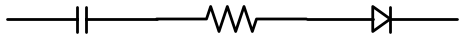

In [1]:
import schemdraw
from schemdraw import elements as e

with schemdraw.Drawing():
    e.Capacitor()
    e.Resistor()
    e.Diode()

### here is a simple line of a circut including a Capacitor, a Resistor and a Diode

If a direction method (`.up()` , `.down()` , `.left()` , `.right()`) is added to an element,
the element is rotated in that direction, and future elements take the same direction:

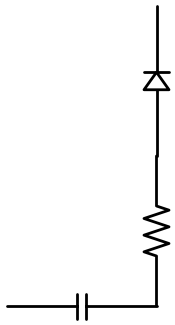

In [2]:
import schemdraw
from schemdraw import elements as e

with schemdraw.Drawing():
    e.Capacitor()
    e.Resistor().up()
    e.Diode()

### here is the same line. but in this one we can see that the direction has changed after the Capacitors due the `.up()` command

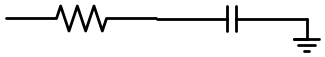

In [6]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing():
    elm.Resistor()  # Draws a resistor
    elm.Capacitor()  # Draws a capacitor
    elm.Ground()  # Adds a ground symbol

### here is a simple line which connects to the ground because of the `elm.Ground()` command

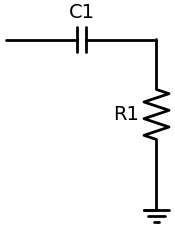

In [7]:
import schemdraw
from schemdraw import elements as e

with schemdraw.Drawing() as d:
    d += e.Capacitor().label('C1')
    d += e.Resistor().down().label('R1')
    d += e.Ground()

### Here’s a basic example of creating a circuit with a labeled voltage source, a resistor, and ground:

## 5. Drawing Elements at Angles
You can rotate elements by specifying the at parameter to position them at any angle
The theta method can be used to specify any rotation angle in degrees.

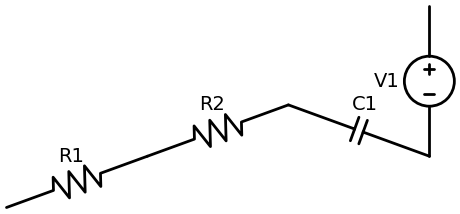

In [18]:
with schemdraw.Drawing():
    elm.Resistor().theta(20).label('R1')
    elm.Resistor().label('R2') 
    elm.Capacitor().theta(-20).label('C1')
    elm.SourceV().label('V1')

### in this example you can see that it is possible to rotate the element in any direction we want

## 6. Connecting Elements
Schemdraw automatically connects elements in series, but you can also specify custom positioning and connections.
Typically, the `schemdraw.elements.lines.Line` element is used to connect elements together. 
More complex line routing requires multiple Line elements. The `schemdraw.elements.lines.Wire` element is used as a shortcut for placing multiple connecting lines at once. The Wire element connects the start and end points based on its shape parameter. 
The `k` parameter is used to set the distance before the wire first changes direction.


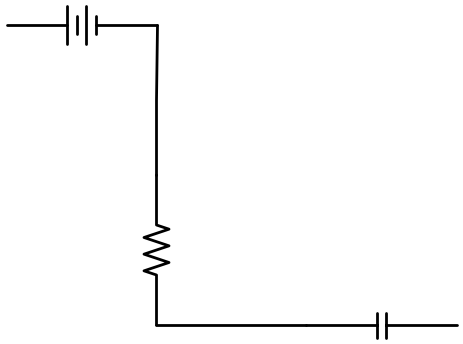

In [21]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    d += elm.Battery()  # Add a battery
    d += elm.Line().down()  # Draw a line downward
    d += elm.Resistor()  # Connect a resistor
    d += elm.Line().right()  # Draw a line to the right
    d += elm.Capacitor()  # Connect a capacitor

### As expected and described in the comments of the code, the circuit has been created

### Anchors:
All elements have a set of predefined anchor positions within the element. For example, a bipolar transistor has `base`, `emitter`, and `collector` anchors. 
All two-terminal elements have anchors named `start`, `center`, and `end`. The docstring for each element lists the available anchors. Once an element is added to the drawing, all its anchor positions will be added as attributes to the element object, so the base position of transistor assigned to variable `Q` may be accessed via `Q.base`.

### At method
Alternatively, one element can be placed starting on the anchor of another element using the at method. 
For example, to draw an opamp and place a resistor on the output, store the Opamp instance to a variable. Then call the at method of the new element passing the `Opamp.out` anchor. After the resistor is drawn, the current drawing position is moved to the endpoint of the resistor.

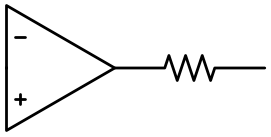

In [20]:
with schemdraw.Drawing():
    opamp = elm.Opamp()
    elm.Resistor().right().at(opamp.out)

### As describes, the desired circuit was created

### Drop Method
Three-terminal elements do not necessarily leave the drawing position where desired, so after drawing an element, the current drawing position can be set using the `schemdraw.elements.Element.drop()` method to specify the anchor at which to place the cursor.

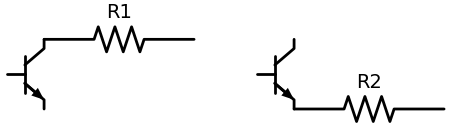

In [22]:
with schemdraw.Drawing() as d:
    bjt1 = elm.BjtNpn()
    elm.Resistor().label('R1')  
    d.move_from(bjt1.base, dx=5)
    bjt2 = elm.BjtNpn().drop('emitter')  
    elm.Resistor().label('R2')

### in the third line we can see Default cursor placement after placing BJT and in the fifth line the cursor was left on the emitter after placing BJT

### Alignment
The second purpose for anchors is aligning new elements with respect to existing elements.

Suppose a resistor has just been placed, and now an Opamp should be connected to the resistor. The anchor method tells the Drawing which input on the Opamp should align with resistor. Here, an Opamp is placed at the end of a resistor, connected to the opamp’s in1 anchor (the inverting input).

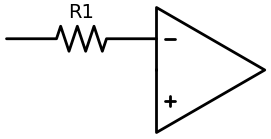

In [23]:
with schemdraw.Drawing():
    elm.Resistor().label('R1')
    elm.Opamp().anchor('in1') 

### In the third line the `in1` anchor was placed at the current drawing position
Compared to anchoring the opamp at in2 (the noninverting input):

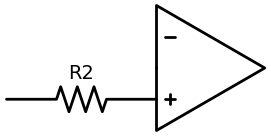

In [24]:
with schemdraw.Drawing():
    elm.Resistor().label('R2')
    elm.Opamp().anchor('in2') 

### In the third line the `in2` anchor was placed at the current drawing position
The to method will set an exact endpoint for a 2-terminal element. 
The starting point is still the ending location of the previous element. 
Notice the Diode is stretched longer than the standard element length in order to fill the diagonal distance.

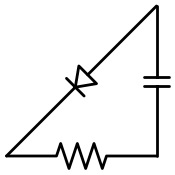

In [25]:
with schemdraw.Drawing() as d:
    R = elm.Resistor()
    C = elm.Capacitor().up()
    Q = elm.Diode().to(R.start)

### The tox and toy

The `tox` and `toy` methods are useful for placing 2-terminal elements to “close the loop”, without requiring an exact length. 
They extend the element horizontally or vertically to the `x-` or `y-` coordinate of the anchor given as the argument. 
These methods automatically change the drawing direction. Here, the Line element does not need to specify an exact length to fill the space and connect back with the Source.

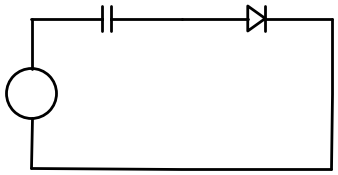

In [26]:
with schemdraw.Drawing():
    C = elm.Capacitor()
    elm.Diode()
    elm.Line().down()

    # Now we want to close the loop, but can use `tox`
    # to avoid having to know exactly how far to go.
    # The Line will extend horizontally to the same x-position
    # as the Capacitor's `start` anchor.
    elm.Line().tox(C.start)

    # Now close the loop by relying on the fact that all
    # two-terminal elements (including Source and Line)
    # are the same length by default
    elm.Source().up()

### Comment

Finally, exact endpoints can also be specified using the endpoints method.

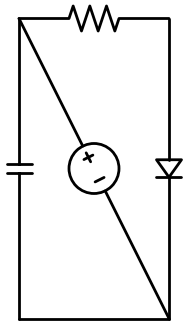

In [27]:
with schemdraw.Drawing():
    R = elm.Resistor()
    Q = elm.Diode().down(6)
    elm.Line().tox(R.start)
    elm.Capacitor().toy(R.start)
    elm.SourceV().endpoints(Q.end, R.start)

## 7. Customizing Components
You can customize components by adjusting their size, label, and orientation.

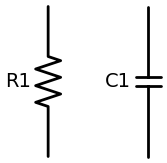

In [28]:
with schemdraw.Drawing() as d:
    d += elm.Resistor().label('R1').at([0, 0]).down()  # Labeled, oriented downward
    d += elm.Capacitor().label('C1').at([2, 0])  # Placed at a specific coordinate

### Note
If a set of circuit elements are to be reused multiple times, they can be grouped into a single element. Create and populate a drawing, but set show=False. Instead, use the Drawing to create a new `schemdraw.elements.ElementDrawing`, which converts the drawing into an element instance to add to other drawings.

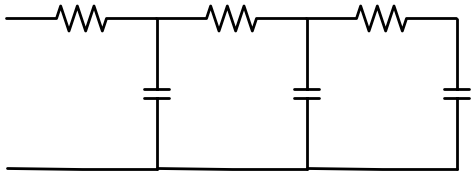

In [29]:
with schemdraw.Drawing(show=False) as d1:
    d1 += elm.Resistor()
    d1.push()
    d1 += elm.Capacitor().down()
    d1 += elm.Line().left()
    d1.pop() ## saves the drawing

with schemdraw.Drawing() as d2:
    for i in range(3):
        d2 += elm.ElementDrawing(d1)  

#### in the second with a second drawing was added and the first drawing was added to it 3 times

## 8. Annotations and Labels

You can annotate circuit elements with text labels, showing values or names of components.

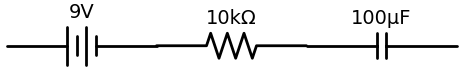

In [31]:
with schemdraw.Drawing() as d:
    d += elm.Battery().label('9V')  # Label the battery
    d += elm.Resistor().label('10kΩ')  # Label the resistor with its value
    d += elm.Capacitor().label('100µF')  # Label the capacitor

### here is a simple one, we will see more complicated labeled circuits in the following section

## 9. Advanced Circuits and Examples

### Discharging capacitor
Shows how to connect to a switch with anchors.

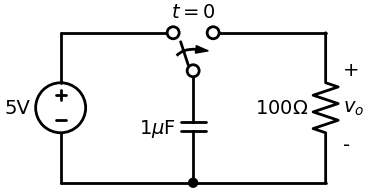

In [32]:
with schemdraw.Drawing() as d:
    V1 = elm.SourceV().label('5V')
    elm.Line().right(d.unit*.75)
    S1 = elm.SwitchSpdt2(action='close').up().anchor('b').label('$t=0$', loc='rgt')
    elm.Line().right(d.unit*.75).at(S1.c)
    elm.Resistor().down().label(r'$100\Omega$').label(['+','$v_o$','-'], loc='bot')
    elm.Line().to(V1.start)
    elm.Capacitor().at(S1.a).toy(V1.start).label(r'1$\mu$F').dot()

#### you can see the switch and the t = 0 part

### Capacitor Network
Shows how to use endpoints to specify exact start and end placement.

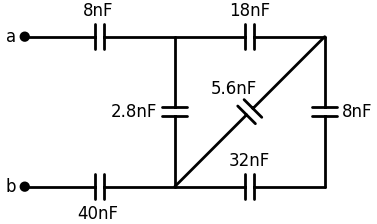

In [33]:
with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    C1 = elm.Capacitor().label('8nF').idot().label('a', 'left')
    C2 = elm.Capacitor().label('18nF')
    C3 = elm.Capacitor().down().label('8nF', loc='bottom')
    C4 = elm.Capacitor().left().label('32nF')
    C5 = elm.Capacitor().label('40nF', loc='bottom').dot().label('b', 'left')
    C6 = elm.Capacitor().endpoints(C1.end, C5.start).label('2.8nF')
    C7 = (elm.Capacitor().endpoints(C2.end, C5.start)
              .label('5.6nF', loc='center', ofst=(-.3, -.1), halign='right', valign='bottom'))

### ECE201-Style Circuit
This example demonstrate use of `push()` and `pop()` and using the ‘tox’ and ‘toy’ methods.

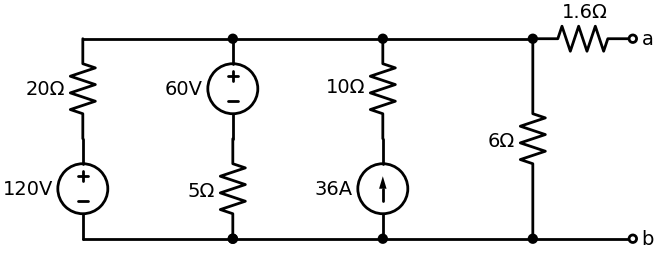

In [34]:
with schemdraw.Drawing() as d:
    d.config(unit=2)  # unit=2 makes elements have shorter than normal leads
    d.push()
    R1 = elm.Resistor().down().label('20Ω')
    V1 = elm.SourceV().down().reverse().label('120V')
    elm.Line().right(3).dot()
    d.pop()
    elm.Line().right(3).dot()
    elm.SourceV().down().reverse().label('60V')
    elm.Resistor().label('5Ω').dot()
    elm.Line().right(3).dot()
    elm.SourceI().up().label('36A')
    elm.Resistor().label('10Ω').dot()
    elm.Line().left(3).hold()
    elm.Line().right(3).dot()
    R6 = elm.Resistor().toy(V1.end).label('6Ω').dot()
    elm.Line().left(3).hold()
    elm.Resistor().right().at(R6.start).label('1.6Ω').dot(open=True).label('a', 'right')
    elm.Line().right().at(R6.end).dot(open=True).label('b', 'right')

#### expected circuit was made

### Infinite Transmission Line
Elements can be added inside for-loops if you need multiples. 
The ellipsis is just another circuit element, called DotDotDot since Ellipsis is a reserved keyword in Python. 
This also demonstrates the `schemdraw.elements.ElementDrawing` class to merge multiple elements into a single definition.

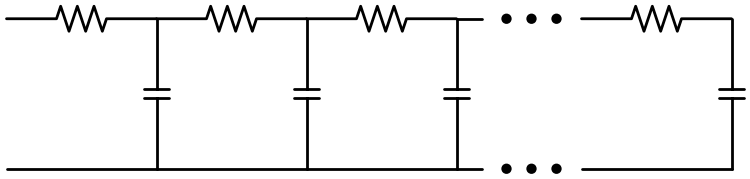

In [35]:
with schemdraw.Drawing(show=False) as d1:
    elm.Resistor()
    d1.push()
    elm.Capacitor().down()
    elm.Line().left()
    d1.pop()

with schemdraw.Drawing() as d2:
    for i in range(3):
        elm.ElementDrawing(d1)

    d2.push()
    elm.Line().length(d2.unit/6)
    elm.DotDotDot()
    elm.ElementDrawing(d1)
    d2.pop()
    d2.here = (d2.here[0], d2.here[1]-d2.unit)
    elm.Line().right().length(d2.unit/6)
    elm.DotDotDot()

#### here is a infinite looped circuit

### Power supply
Notice the diodes could be added individually, but here the built-in Rectifier element is used instead. 
Also note the use of newline characters inside resistor and capacitor labels.

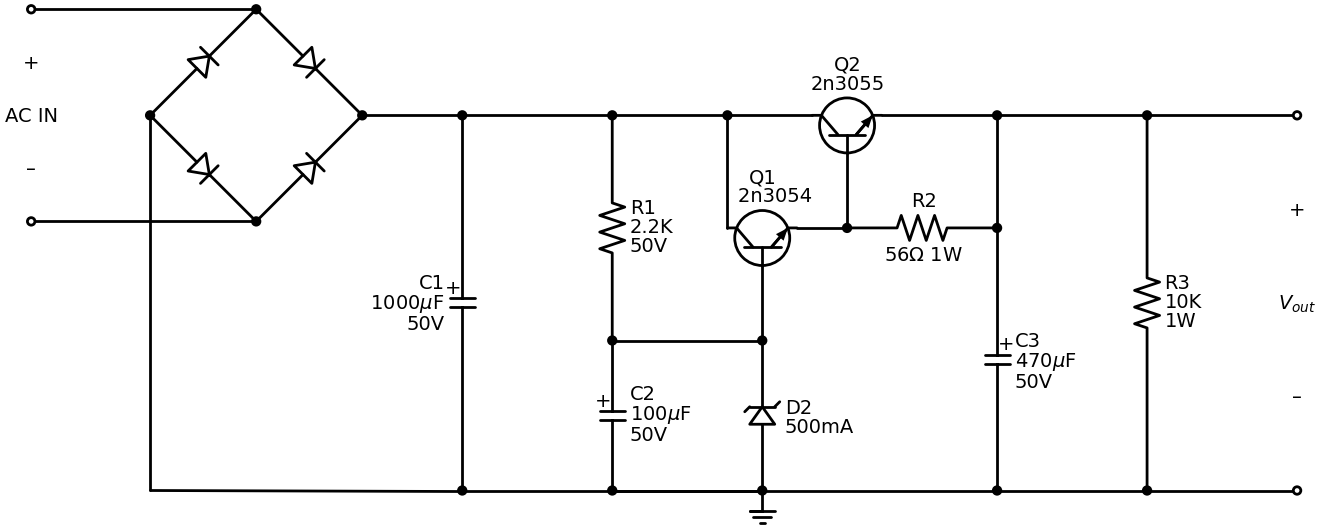

In [36]:
with schemdraw.Drawing() as d:
    d.config(inches_per_unit=.5, unit=3)
    D = elm.Rectifier()
    elm.Line().left(d.unit*1.5).at(D.N).dot(open=True).idot()
    elm.Line().left(d.unit*1.5).at(D.S).dot(open=True).idot()
    G = elm.Gap().toy(D.N).label(['–', 'AC IN', '+'])

    top = elm.Line().right(d.unit*3).at(D.E).idot()
    Q2 = elm.BjtNpn(circle=True).up().anchor('collector').label('Q2\n2n3055')
    elm.Line().down(d.unit/2).at(Q2.base)
    Q2b = elm.Dot()
    elm.Line().left(d.unit/3)
    Q1 = elm.BjtNpn(circle=True).up().anchor('emitter').label('Q1\n    2n3054')
    elm.Line().at(Q1.collector).toy(top.center).dot()

    elm.Line().down(d.unit/2).at(Q1.base).dot()
    elm.Zener().down().reverse().label('D2\n500mA', loc='bot').dot()
    G = elm.Ground()
    elm.Line().left().dot()
    elm.Capacitor(polar=True).up().reverse().label('C2\n100$\\mu$F\n50V', loc='bot').dot()
    elm.Line().right().hold()
    elm.Resistor().toy(top.end).label('R1\n2.2K\n50V', loc='bot').dot()

    d.move(dx=-d.unit, dy=0)
    elm.Capacitor(polar=True).toy(G.start).flip().label('C1\n 1000$\\mu$F\n50V').dot().idot()
    elm.Line().at(G.start).tox(D.W)
    elm.Line().toy(D.W).dot()

    elm.Resistor().right().at(Q2b.center).label('R2').label('56$\\Omega$ 1W', loc='bot').dot()
    d.push()
    elm.Line().toy(top.start).dot()
    elm.Line().tox(Q2.emitter)
    d.pop()
    elm.Capacitor(polar=True).toy(G.start).label('C3\n470$\\mu$F\n50V', loc='bot').dot()
    elm.Line().tox(G.start).hold()
    elm.Line().right().dot()
    elm.Resistor().toy(top.center).label('R3\n10K\n1W', loc='bot').dot()
    elm.Line().left().hold()
    elm.Line().right()
    elm.Dot(open=True)
    elm.Gap().toy(G.start).label(['+', '$V_{out}$', '–'])
    elm.Dot(open=True)
    elm.Line().left()

#### here is an example including everything we mentioned

## 10. Conclusion
With schemdraw, you can easily create high-quality circuit diagrams using Python. We covered the basic elements, how to draw components at various angles, connect them, and customize with annotations and labels. From resistors to transistors and capacitors, schemdraw supports a wide range of circuit elements, making it suitable for drawing both simple and complex diagrams.

For further exploration, you can refer to the official documentation to experiment with additional components and advanced styling.

## 11. Resources 
[Ron Sheely's github repository](https://github.com/RonSheely/schemdraw)
[official documentation](https://schemdraw.readthedocs.io/en/stable/index.html)
[python.org](https://www.python.org/)